In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
df = pd.read_csv("/content/balanced_stroke_data.csv")

# Drop the 'id' column
data = df.drop(columns=['id'])

# Step 2: Impute missing values
# For numerical columns, replace missing values with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# For categorical columns, replace missing values with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
#data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Step 3: Identify categorical columns and encode them
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Step 4: Define features (X) and target (y)
X = data.drop(columns=['stroke'])  # All features except 'stroke'
y = data['stroke']  # Target variable 'stroke'

# ***NEW: Scale features to the range [0, 1]***
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Step 5: Apply Chi-Square Test
chi2_selector = SelectKBest(chi2, k="all")  # Get scores for all features
chi2_selector.fit(X, y)

# Step 6: Get Chi-Square Scores and p-values
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Feature': data.drop(columns=['stroke']).columns,  # Use original column names
    'Chi2 Score': chi2_scores,
    'p-value': chi2_pvalues
}).sort_values(by='Chi2 Score', ascending=False)

# Step 7: Print the Chi-Square Test results
print("Chi-Square Test Results:")
print(chi2_results)

FileNotFoundError: [Errno 2] No such file or directory: '/content/balanced_stroke_data.csv'

In [ ]:
import pandas as pd

# Load the dataset (without any preprocessing)
df = pd.read_csv("/content/balanced_stroke_data.csv")
data = df.drop(columns=['id'])

# Select only the numerical columns
numerical_df = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numerical columns only
corr_matrix = numerical_df.corr()

# Find the highest positive and highest negative correlations
corr_pairs = corr_matrix.unstack()
filtered_pairs = corr_pairs[corr_pairs != 1]

# Find the highest positive correlation
highest_positive_corr = filtered_pairs.idxmax()
highest_positive_value = filtered_pairs.max()

# Find the highest negative correlation
highest_negative_corr = filtered_pairs.idxmin()
highest_negative_value = filtered_pairs.min()

# Print the results
print("Highest Positive Correlation:", highest_positive_corr, "with value:", highest_positive_value)
print("Highest Negative Correlation:", highest_negative_corr, "with value:", highest_negative_value)



Highest Positive Correlation: ('age', 'ever_married_Yes') with value: 0.6178125232021715
Highest Negative Correlation: ('age', 'work_type_children') with value: -0.6195468089451851


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load the preprocessed data
data = pd.read_csv('/content/balanced_stroke_data.csv')

In [ ]:
# Step 3: Define features and target
X = data.drop(columns=['id', 'stroke'])  # drop 'id' and target variable 'stroke'
y = data['stroke']  # target variable 'stroke'

In [ ]:
# head of the data
data.head()

# stats
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,36826.298293,0.518135,0.082596,0.045052,0.259838,0.092103,0.425417,0.000103,0.769038,0.002263,0.581774,0.209035,0.073288,0.525313,0.226083,0.365019,0.161132,0.500000
std,21489.844775,0.956474,0.275285,0.207430,1.047688,0.838272,0.452071,0.010142,0.402120,0.047519,0.450941,0.368427,0.258928,0.456245,0.378368,0.442615,0.335825,0.500026
min,67.000000,-1.908261,0.000000,0.000000,-1.381335,-2.514310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17587.750000,-0.054250,0.000000,0.000000,-0.574893,-0.401274,0.000000,0.000000,0.711408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36724.000000,0.779962,0.000000,0.000000,-0.013736,0.002269,0.183666,0.000000,1.000000,0.000000,0.835892,0.000000,0.000000,0.603201,0.000000,0.000000,0.000000,0.500000
75%,55772.750000,1.284884,0.000000,0.000000,1.116219,0.520144,1.000000,0.000000,1.000000,0.000000,1.000000,0.271697,0.000000,1.000000,0.365250,1.000000,0.000000,1.000000
max,72940.000000,1.714845,1.000000,1.000000,2.058363,2.556977,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Naïve Bayes Classifier:
Accuracy: 58.18%
              precision    recall  f1-score   support

         0.0       0.94      0.17      0.29      1457
         1.0       0.55      0.99      0.70      1460

    accuracy                           0.58      2917
   macro avg       0.74      0.58      0.50      2917
weighted avg       0.74      0.58      0.50      2917



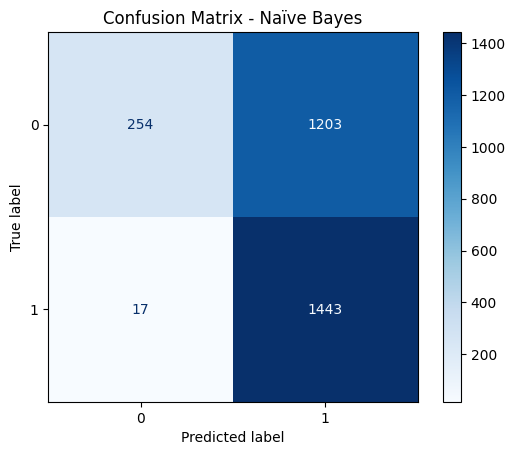

In [ ]:
# Step 5: Train and evaluate Naïve Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes Classifier:")
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap='Blues')
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


Decision Tree Classifier:
Accuracy: 93.11%
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1457
         1.0       0.93      0.93      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



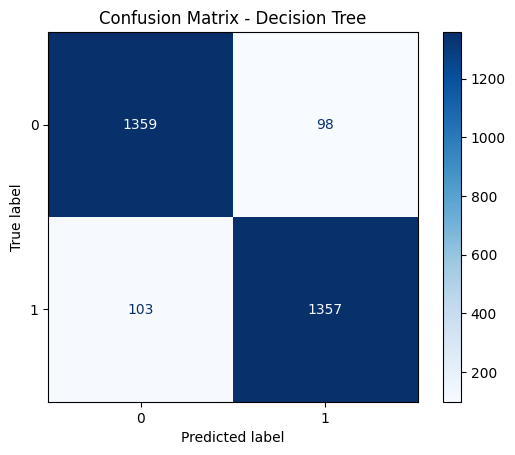

In [ ]:
# Step 6: Train and evaluate Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()



K-Nearest Neighbors Classifier:
Accuracy: 90.26%
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      1457
         1.0       0.89      0.92      0.90      1460

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917



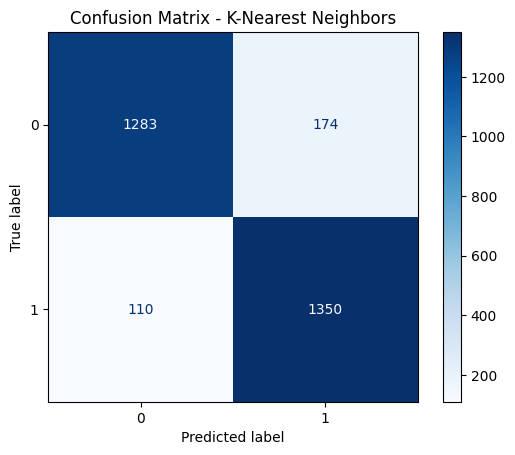

In [ ]:
# Step 7: Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))

# Plot confusion matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()



Random forest Classifier:
Accuracy: 96.71%
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1457
         1.0       0.99      0.94      0.97      1460

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



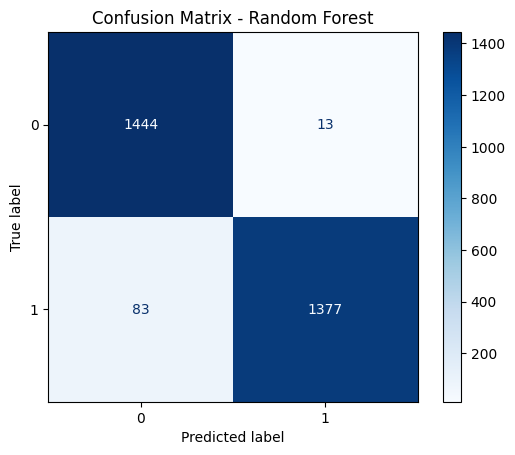

In [ ]:
# Step 8: Train and evaluate Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom forest Classifier:")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Top positive correlations:
 stroke              1.000000
age                 0.599778
ever_married_Yes    0.309675
Name: stroke, dtype: float64
Top negative correlations:
 hypertension             -0.022794
work_type_Never_worked   -0.047624
work_type_children       -0.261202
Name: stroke, dtype: float64


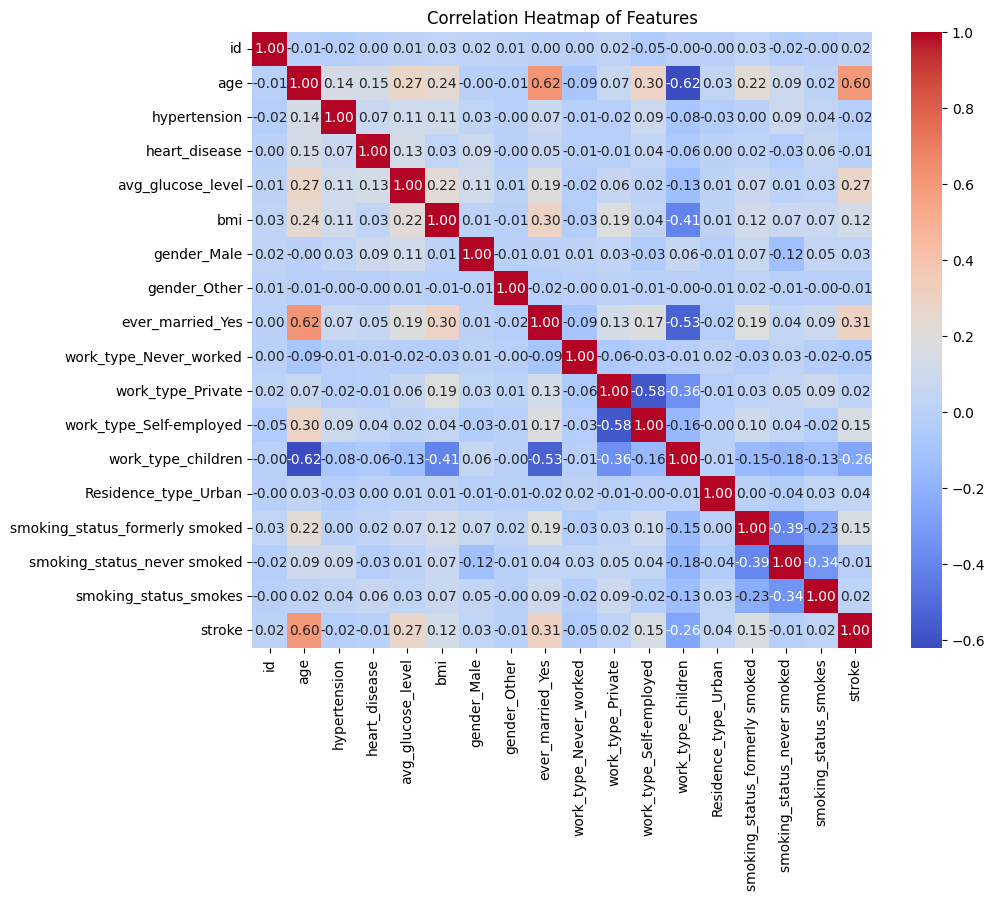

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/balanced_stroke_data.csv")  # Adjust path as needed
# Correlation analysis with the target variable
correlations = df.corr()['stroke'].sort_values(ascending=False)
print("Top positive correlations:\n", correlations.head(3))
print("Top negative correlations:\n", correlations.tail(3))

# Visualize correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Best Decision Tree Accuracy:", grid_search_dt.best_score_)

# Predict with best Decision Tree
y_pred_dt_best = best_dt.predict(X_test)
print("\nTuned Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_best)}")
print(classification_report(y_test, y_pred_dt_best))

# Parameter tuning for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best K-Nearest Neighbors Parameters:", grid_search_knn.best_params_)
print("Best K-Nearest Neighbors Accuracy:", grid_search_knn.best_score_)

# Predict with best K-Nearest Neighbors
y_pred_knn_best = best_knn.predict(X_test)
print("\nTuned K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_best)}")
print(classification_report(y_test, y_pred_knn_best))
